# Import library yang diperlukan

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Memanggil data

In [59]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Melihat daftar kolom dataframe

In [60]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

# Melihat info dataframe

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Menjumlahkan data yang kosong

In [62]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Menghitung data yang NaN

In [63]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Melihat informasi terkait jumlah baris dan kolom dataframe

In [64]:
df.shape

(41188, 21)

# Melihat duplikat data

In [65]:
cek_duplikat = df[df.duplicated()]
cek_duplikat

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


# Melakukan drop data yang duplikat

In [79]:
df.drop_duplicates(inplace=True)

In [67]:
df.shape

(41176, 21)

# Melihat isi data yang unik pada kolom tertentu yang akan digunakan

In [68]:
print('Isi kolom age', df['age'].unique())
print('Isi kolom job', df['job'].unique())
print('Isi kolom education', df['education'].unique())
print('Isi kolom housing', df['housing'].unique())
print('Isi kolom loan', df['loan'].unique())

Isi kolom age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Isi kolom job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Isi kolom education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Isi kolom housing ['no' 'yes' 'unknown']
Isi kolom loan ['no' 'yes' 'unknown']


# Membuat dataframe baru berdasarkan df sebelumnya

In [69]:
df_clean = df.copy()
df_clean.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Membuat visualisasi

## Terlihat bahwa pada data yang ada itu sangat jomplang antara jumlah kolom y yang 'yes' dan 'no' nya

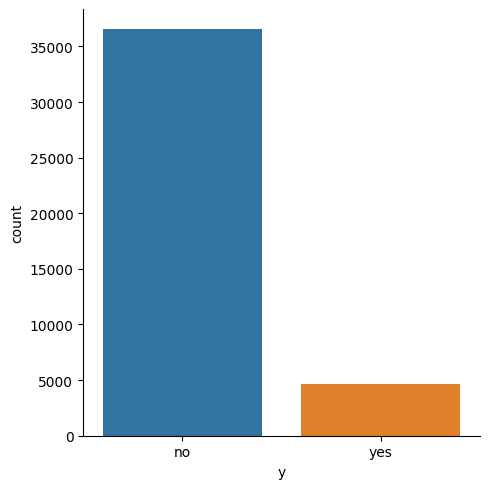

In [70]:
sns.catplot(data=df_clean, x='y', kind='count')

## Terlihat berdasarkan grafik di bawah bahwa usia yang paling bahyak itu ada pada range 30-34 tahun

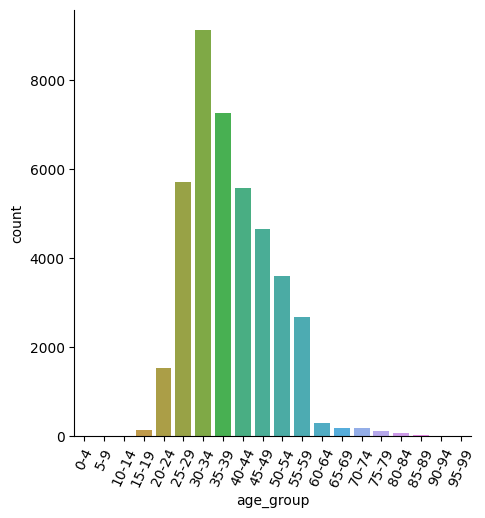

In [78]:
interval = 5
max_age = df_clean['age'].max()
bins = list(range(0, max_age + interval, interval))
labels = [f'{i}-{i+interval-1}' for i in bins[:-1]]

df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels)

plot = sns.catplot(data=df_clean, x='age_group', kind='count', order=labels)
plot.set_xticklabels(rotation=65)
plt.show()

# Melakukan penyesuain data agar menjadi angka saja dan akan berdampak kepada pembuatan model yang akan semakin mudah di training

In [16]:
ports = {"yes":1,
         "no":0,
         "unknown" : np.nan
        }
df_clean['housing'] = df_clean['housing'].map(ports)
df_clean['loan'] = df_clean['loan'].map(ports)
df_clean['default'] = df_clean['default'].map(ports)
df_clean.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df_clean['default'].isna().sum()

4484

# Melakukan penyesuain data yang kosong dengan nilai modusnya

In [18]:
df_clean['default'] = df_clean['default'].fillna(df_clean['default'].mode()[0])
df_clean['housing'] = df_clean['housing'].fillna(df_clean['housing'].mode()[0])
df_clean['loan'] = df_clean['loan'].fillna(df_clean['loan'].mode()[0])

In [19]:
df_clean.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Penentuan features yang akan digunakan untuk membangun model machine learningnya nanti

In [20]:
features = ['age', 'job', 'education', 'housing', 'loan']

# Penentuan komponen x dan y nya

In [21]:
X = df_clean[features]
y = df_clean['y']

In [22]:
X = pd.get_dummies(X, columns=['job', 'education', 'housing', 'loan'])
y = pd.get_dummies(y)
y = y['yes']

# Melakukan smote karena datanya sangat jomplang antara 'yes' dan 'no' nya

In [23]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

# membuat test splitnya

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Melakukan proses skala pada dataframe yang akan dijadikan model machine learning

In [28]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pembangunan model machine learning logistic regression

In [49]:
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train, y_train)
predict_logistic_regression = model_logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, predict_logistic_regression)
print("Akurasi model Logistic Regression:", accuracy)

# Melihat laporan klasifikasi
print(classification_report(y_test, predict_logistic_regression))

Akurasi model Logistic Regression: 0.8658558082143487
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2817
           1       1.00      0.73      0.85      2856

    accuracy                           0.87      5673
   macro avg       0.89      0.87      0.86      5673
weighted avg       0.89      0.87      0.86      5673



# Pembangunan model machine learning KNN

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Akurasi model KNN:", accuracy)

# Melihat laporan klasifikasi
print(classification_report(y_test, predictions))

Akurasi model KNN: 0.8968799576943416
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2817
           1       0.90      0.90      0.90      2856

    accuracy                           0.90      5673
   macro avg       0.90      0.90      0.90      5673
weighted avg       0.90      0.90      0.90      5673



# Pembangunan model machine learning SVM

In [41]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Akurasi model SVM:", accuracy)

# Melihat laporan klasifikasi
print(classification_report(y_test, predictions))

Akurasi model SVM: 0.8658558082143487
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2817
           1       1.00      0.73      0.85      2856

    accuracy                           0.87      5673
   macro avg       0.89      0.87      0.86      5673
weighted avg       0.89      0.87      0.86      5673



# Pembangunan model machine learning decision tree

In [43]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Latih model Decision Tree menggunakan data pelatihan
decision_tree_model.fit(X_train, y_train)

predictions = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Akurasi model Decision Tree:", accuracy)

# Melihat laporan klasifikasi
print(classification_report(y_test, predictions))

Akurasi model Decision Tree: 0.9046359950643399
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2817
           1       0.89      0.92      0.91      2856

    accuracy                           0.90      5673
   macro avg       0.91      0.90      0.90      5673
weighted avg       0.90      0.90      0.90      5673



# Pembangunan model machine learning random forest

In [45]:
random_forest_model = RandomForestClassifier(random_state=42)

# Latih model Random Forest menggunakan data pelatihan
random_forest_model.fit(X_train, y_train)

predictions = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Akurasi model Random Forest:", accuracy)

# Melihat laporan klasifikasi
print(classification_report(y_test, predictions))

Akurasi model Random Forest: 0.9065750044068395
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2817
           1       0.90      0.92      0.91      2856

    accuracy                           0.91      5673
   macro avg       0.91      0.91      0.91      5673
weighted avg       0.91      0.91      0.91      5673



# Pembangunan model machine learning Naive Bayes

In [47]:
naive_bayes_model = GaussianNB()

# Latih model Naive Bayes menggunakan data pelatihan
naive_bayes_model.fit(X_train, y_train)\

predictions = naive_bayes_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Akurasi model Naive Bayes:", accuracy)

# Melihat laporan klasifikasi
print(classification_report(y_test, predictions))

Akurasi model Naive Bayes: 0.5799400669839591
              precision    recall  f1-score   support

           0       0.87      0.18      0.30      2817
           1       0.55      0.97      0.70      2856

    accuracy                           0.58      5673
   macro avg       0.71      0.58      0.50      5673
weighted avg       0.71      0.58      0.50      5673



# Berdasarkan hasil berbagai algoritma di atas dapat disimpulkan bahwa algoritma terbaiknya adalah dengan algoritma Random Forest dengan nilai akurasi 90,6%